In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("matplotlb_style.txt")


In [2]:
# Load specified rows from the Excel file into two separate dataframes
file_path_excel = 'RVS_results.xlsx'

In [3]:
# Read rows 2 to 12 (Excel rows are 1-indexed, so in pandas it's 1 to 11)
dataframe1 = pd.read_excel(file_path_excel, skiprows=1, nrows=10, sheet_name=0)

# Read rows 16 to 26 (Excel rows are 1-indexed, so in pandas it's 15 to 25)
dataframe2 = pd.read_excel(file_path_excel, skiprows=15, nrows=10, sheet_name=0)


In [4]:
# Display the first few rows of each dataframe
dataframe1.head(10)

,Model,Group,DR,AMD,Glaucoma,Normal
0,UNet,3 vs 1,89.09,90.92,90.05,92.11
1,UNet,Sub-group,90.19,92.40,90.78,92.81
2,FR-UNet,3 vs 1,90.04,91.24,89.77,92.32
3,FR-UNet,Sub-group,90.32,92.59,90.24,92.99
4,MA-Net,3 vs 1,88.58,90.28,90.00,92.01
5,MA-Net,Sub-group,89.76,91.92,90.43,92.56
6,SA-UNet,3 vs 1,84.83,86.40,87.39,89.75
7,SA-UNet,Sub-group,86.07,88.02,87.10,89.87
8,W-Net,3 vs 1,82.55,84.69,82.22,87.03
9,W-Net,Sub-group,83.00,85.39,83.51,87.59


In [5]:
df_melted = dataframe1.melt(id_vars=["Model", "Group"], value_vars=["DR", "AMD", "Glaucoma", "Normal"], var_name="Condition", value_name="Dice")


In [6]:
df_melted.to_csv('melted.csv', index=False)

/var/folders/jl/4n3x30zj4_q0230vmsgjhjbh0000gn/T/ipykernel_2690/448509984.py:54: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig('figures/subgroup.pdf', dpi=500, bbox_extra_artists=(legend,), bbox_inches='tight')
/var/folders/jl/4n3x30zj4_q0230vmsgjhjbh0000gn/T/ipykernel_2690/448509984.py:54: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  plt.savefig('figures/subgroup.pdf', dpi=500, bbox_extra_artists=(legend,), bbox_inches='tight')
/Users/jeremiahfadugba/anaconda3/lib/python3.11/site-packages/IPython/core/pylabtools.py:152: UserWarning: There are no gridspecs with layoutgrids. Possibly did not call parent GridSpec with the "figure" keyword
  fig.canvas.print_figure(bytes_io, **kw)


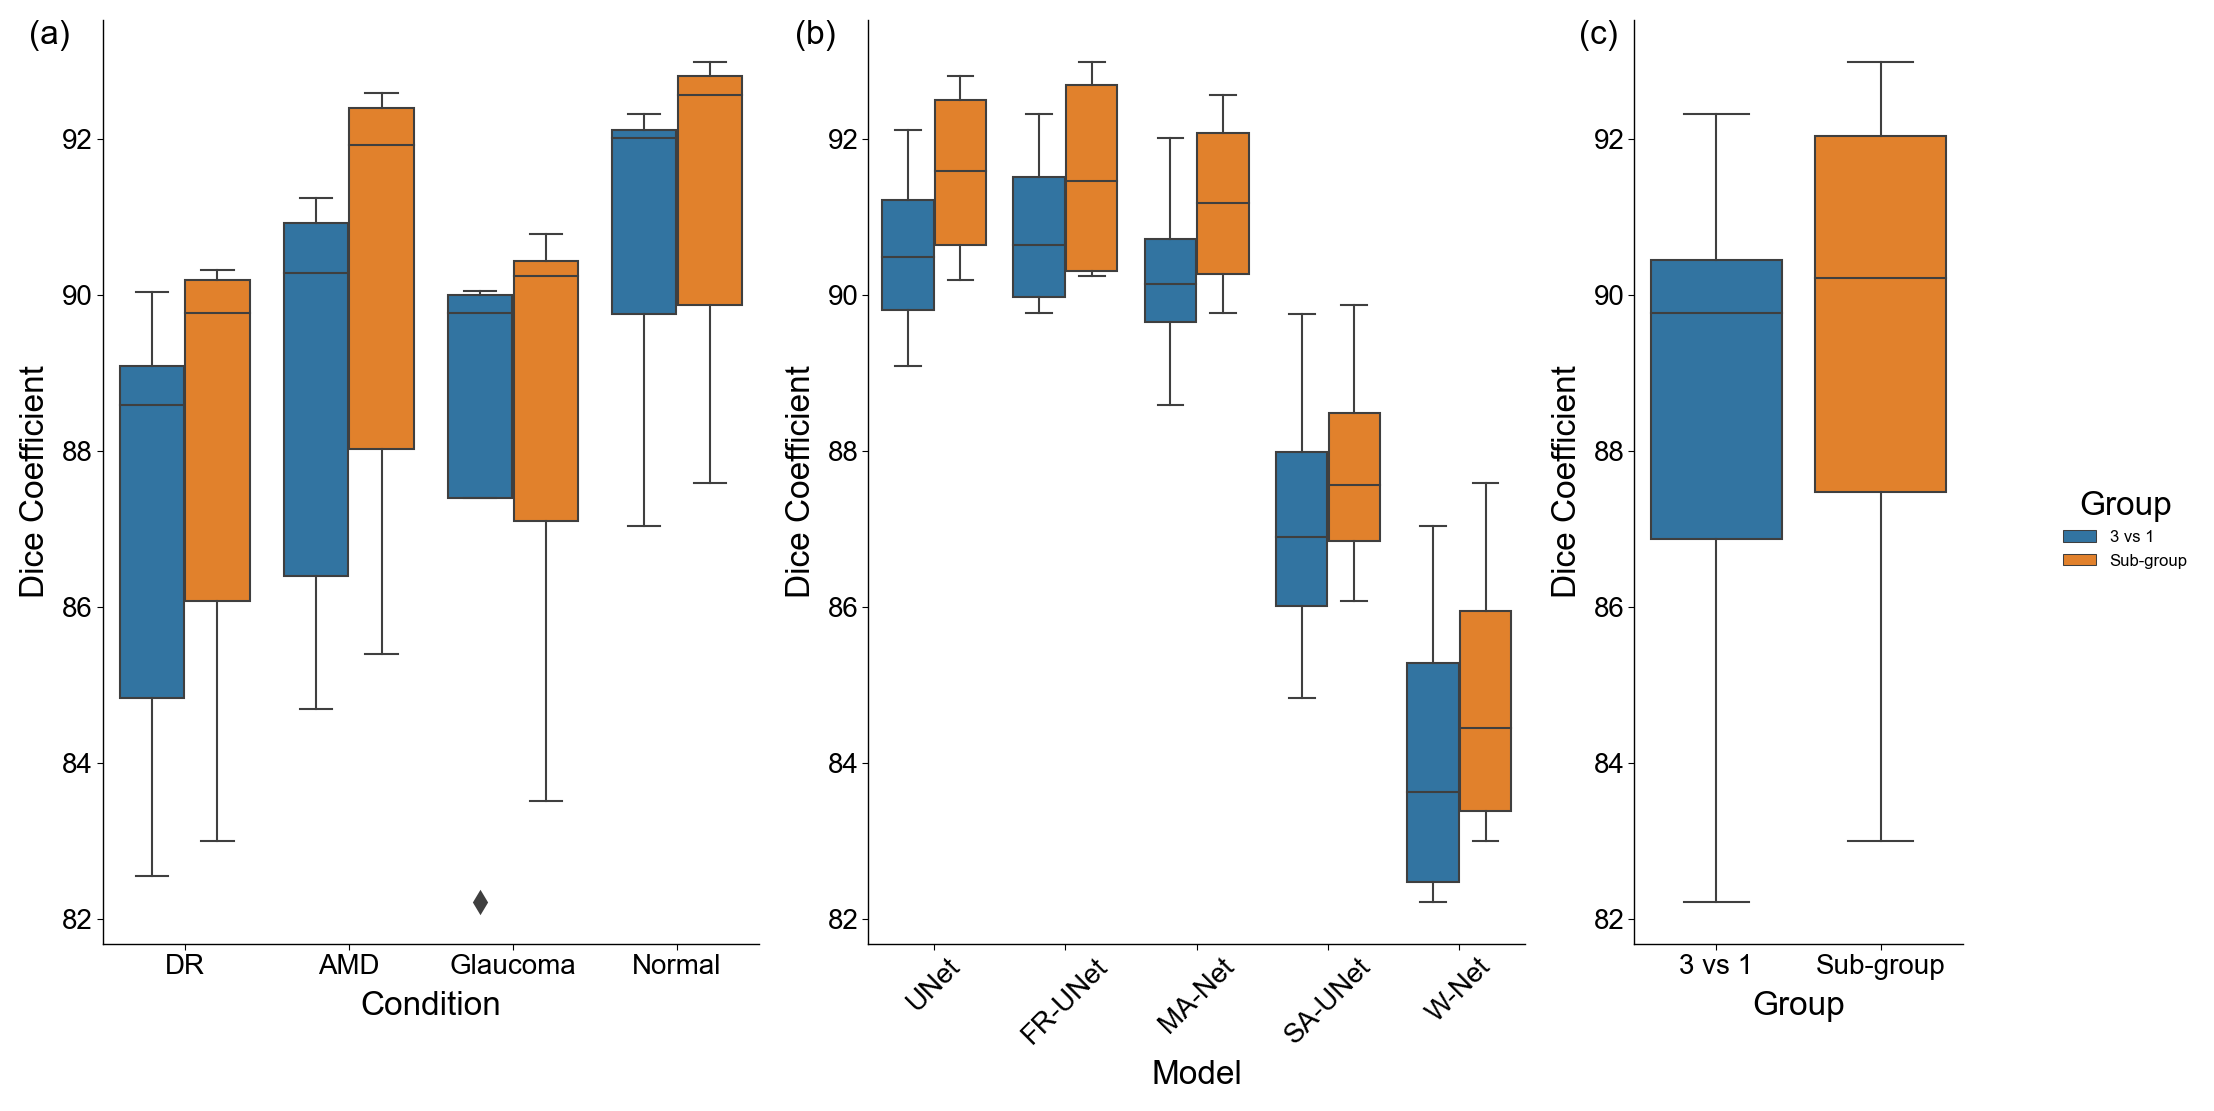

In [15]:
# Get a list of conditions, groups, and models
conditions = df_melted['Condition'].unique()
groups = df_melted['Group'].unique()
models = df_melted['Model'].unique()

import matplotlib.gridspec as gridspec

# Create a figure and a GridSpec with unequal column widths
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 3, width_ratios=[2, 2, 1])  # Adjust the width ratios as needed

palette = sns.color_palette("tab10", as_cmap=False)

# Function to remove top and right spines
def remove_spines(ax):
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)

# First subplot for Conditions
ax1 = plt.subplot(gs[0])
sns.boxplot(x='Condition', y='Dice', hue='Group', data=df_melted, ax=ax1, palette=palette)
ax1.set_xticklabels(conditions)
ax1.set_ylabel('Dice Coefficient')
remove_spines(ax1)

# Second subplot for Models
ax2 = plt.subplot(gs[1])
sns.boxplot(x='Model', y='Dice', hue='Group', data=df_melted, ax=ax2, palette=palette)
ax2.set_xticklabels(models, rotation=45)
ax2.set_ylabel('Dice Coefficient')
remove_spines(ax2)

# Third subplot for Groups (with smaller width)
ax3 = plt.subplot(gs[2])
sns.boxplot(x='Group', y='Dice', data=df_melted, ax=ax3, palette=palette)
ax3.set_xticklabels(groups)
ax3.set_ylabel('Dice Coefficient')
remove_spines(ax3)

# Remove legends
ax1.legend([],[], frameon=False)
ax2.legend([],[], frameon=False)

# Add subplot indices
ax1.text(-0.05, 1.0, '(a)', transform=ax1.transAxes, fontsize=12, va='top', ha='right')
ax2.text(-0.05, 1.0, '(b)', transform=ax2.transAxes, fontsize=12, va='top', ha='right')
ax3.text(-0.05, 1.0, '(c)', transform=ax3.transAxes, fontsize=12, va='top', ha='right')

# Place the legend outside the figure on the right
handles, labels = ax1.get_legend_handles_labels()
legend = fig.legend(handles, labels, loc='upper right', bbox_to_anchor=(1.0, 0.5), title="Group")

# Save the figure, adjust the bbox_inches to include the external legend
plt.savefig('figures/subgroup.pdf', dpi=500, bbox_extra_artists=(legend,), bbox_inches='tight')

plt.show()
